In [1]:
!pip install qiskit==0.39.0
!pip install qiskit[visualization]
!pip install matplotlib
!pip install pylatexenc

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.4/240.4 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 929.7/929.7 kB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.3/157.3 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 5.5 MB/s eta 0:00:00
  Created 

In [2]:
# Importing the necessary libraries from Qiskit
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.quantum_info import Statevector

     ┌───┐          ┌───┐┌─┐        
q_0: ┤ X ├───────■──┤ H ├┤M├──────■─
     ├───┤     ┌─┴─┐└┬─┬┘└╥┘      │ 
q_1: ┤ H ├──■──┤ X ├─┤M├──╫───■───┼─
     └───┘┌─┴─┐└───┘ └╥┘  ║ ┌─┴─┐ │ 
q_2: ─────┤ X ├───────╫───╫─┤ X ├─■─
          └───┘       ║   ║ └───┘   
c_0: ═════════════════╬═══╩═════════
                      ║             
c_1: ═════════════════╩═════════════
                                    


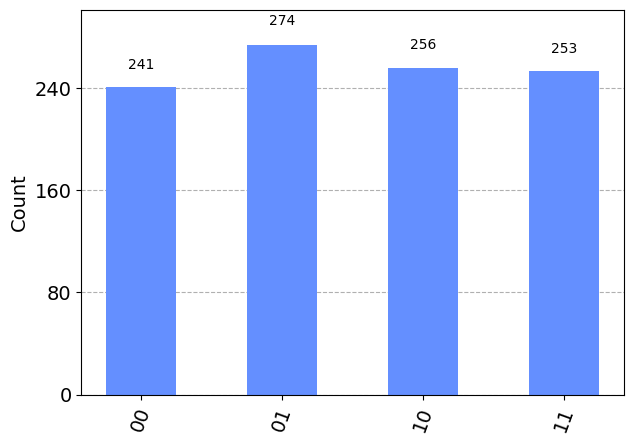

In [3]:
# Create a Quantum Circuit with 3 qubits and 2 classical bits
qc = QuantumCircuit(3, 2)

# Step 1: Prepare an arbitrary state for qubit 0 (Alice's qubit)
# For simplicity, let's use an X-gate (which acts as a NOT gate) to put it in |1>
qc.x(0)

# Step 2: Create entanglement between qubit 1 (Alice's second qubit) and qubit 2 (Bob's qubit)
qc.h(1)  # Apply Hadamard gate to qubit 1 to create superposition
qc.cx(1, 2)  # Apply CNOT gate (control on qubit 1, target on qubit 2) to entangle qubit 1 and qubit 2

# Step 3: Alice applies quantum gates to entangle her qubits
qc.cx(0, 1)  # Apply CNOT gate (control on qubit 0, target on qubit 1)
qc.h(0)  # Apply Hadamard gate to qubit 0

# Step 4: Alice measures her qubits
qc.measure([0, 1], [0, 1])  # Measure qubit 0 and qubit 1 and store the result in classical bits

# Step 5: Bob applies gates based on Alice's measurement results
# These gates are conditioned on the classical bits (results of Alice's measurements)
qc.cx(1, 2)  # Apply CNOT gate based on qubit 1's measurement
qc.cz(0, 2)  # Apply Z gate based on qubit 0's measurement

# Visualize the quantum circuit
print(qc)

# Execute the circuit on the statevector simulator (to see the final state)
simulator = Aer.get_backend('statevector_simulator')
result = execute(qc, backend=simulator).result()
statevector = result.get_statevector()

# Display the final quantum state of Bob's qubit (qubit 2)
plot_bloch_multivector(statevector)

# Execute the circuit on the qasm simulator (to get measurement probabilities)
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=simulator, shots=1024).result()
counts = result.get_counts()

# Plot the measurement results
plot_histogram(counts)